# Fundamentals of Data Analysis - Project
- **Course** Higher Diploma in Data Analytics, GMIT, Ireland
- **Lecturer** Ian McLoughlin
- **Author** Mark Cotter
- **Email** g00376335@gmit.ie
- **Dates** September 2019 to November 2019

This document is my analysis of the well-known 'tips' dataset. The program run in this jupyter notebook and uses the python programming language to analyse the dataset.

### Import python libraries and dataset

This code imports python libraries and the 'tips' dataset.

In [1]:
# import numpy for use of arrays
import numpy as np
# import pandas to use DataFrames for the dataset
import pandas as pd
# Import pyplot for plotting
import matplotlib.pyplot as plt
# import seaborn for ploting and loading tips dataset
import seaborn as sns
#The python seaborn module already includes the 'tips' dataset
#Code adapted from https://seaborn.pydata.org/introduction.html?highlight=tips%20dataset
tips = sns.load_dataset("tips")

### Dataset desciption

#### Initial dataset review
This code prints a brief summary of the dataset content.

In [2]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


The table above lists the first 5 lines of the 'tips' dataset.

In [3]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


The table above lists the last 5 lines of the 'tips' dataset.

The 'tips' dataset includes 244 observations during which 7 variables were recorded. Based on the names of the variables, it appears that the dataset relates to information recorded at a restaurant over a number of days.

My research showed that there are varying opinions on what the variable 'sex' represents. A number of websites describe the sex variable (references https://rdrr.io/cran/regclass/man/TIPS.html and https://towardsdatascience.com/aggregation-and-grouping-66396f26dd95) as the 'gender of the payer of the bill' and that the observation where taken by one waiter.

Other sources (references https://dfrieds.com/data-visualizations/bar-plot-python-pandas and https://dfrieds.com/data-analysis/groupby-python-pandas) describe the sex variable as 'the sex of the waiting staff'.

I agree with the opinion that the observation are recorded by one waiter and the variable 'sex' relates to the 'gender of the payer of the bill'. For the purposes of this analyse, the variables observed in the dataset are assumed to represent the following:

**Variable** | **Description** 
-: | :-
**total_bill** | The total cost of the bill for a meals at a table
**tip** | The tip received by the table waiter
**sex** | The sex of the table bill payer
**smoker** | Weather or not the bill payer was a smoker 
**day** | Day of the week 
**time** | Meal time 
**size** | The party size that was served

Insofar as the word 'size' is a python keyword that returns the number of elements in a pandas dataframe (reference https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.size.html), I have opted to change this variable name to 'party_size' to simplify my assessment of the dataset.

In [4]:
# Change Dataframe column heading from 'size' to 'partysize'
# Code adapted from https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas
tips.rename(columns={'size': 'party_size'}, inplace=True)

#### Basic dataset statistics

This code describes some basis statistics about the dataset.

In [5]:
# Print summary text
print("\nSummary of tips dataset statistics")

# Display number of observations
# Code adapted from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html
print("Number of observations in the dataset is", tips.total_bill.count())

# Display the min, max, mean and median total_bill rounded to 2 decimal
# Code adapted from https://stackoverflow.com/questions/455612/limiting-floats-to-two-decimal-points
print("Max, min, mean and median values for the total_bill are", tips.total_bill.max(),
      ",", tips.total_bill.min(), "and", round((tips.total_bill.mean()), 2),
      "and", round((tips.total_bill.median()),2))

# Display the min, max, mean and median tip rounded to 2 decimal
print("Max, min, mean and median values for the tip are", tips.tip.max(),
      ",", tips.tip.min(), ",", round((tips.tip.mean()), 2),
      "and", round((tips.tip.median()),2))

# Display the min, max and median party size
print("Max, min and median values for the party size are", tips.party_size.max(),
      ",", tips.party_size.min(), "and", (int(tips.party_size.median())))

# Get sizes of groups of smoker variable == 'Yes' or 'No'
# Code adapted from https://erikrood.com/Python_References/count_frequency_value_occurs_dataframe_final.html
smoker = tips.groupby('smoker').size()
# Display % of smokers
print("The percentage of smokers paying the bill is", int(100 * smoker['Yes']/(smoker['Yes']+smoker['No'])), "%")

# Get sizes of groups of smoker variable == 'Male' or 'Female'
sex = tips.groupby('sex').size()
# Display % sex of patron
print("The percentage of male patrons paying the bill is", int(100 * sex['Male']/(sex['Male']+sex['Female'])), "%")

# Display unique values of days
# Code adapted from https://chrisalbon.com/python/data_wrangling/pandas_list_unique_values_in_column/
print("List of days of the week included in the data are\n", list(tips.day.unique()))


Summary of tips dataset statistics
Number of observations in the dataset is 244
Max, min, mean and median values for the total_bill are 50.81 , 3.07 and 19.79 and 17.8
Max, min, mean and median values for the tip are 10.0 , 1.0 , 3.0 and 2.9
Max, min and median values for the party size are 6 , 1 and 2
The percentage of smokers paying the bill is 38 %
The percentage of male patrons paying the bill is 64 %
List of days of the week included in the data are
 ['Sun', 'Sat', 'Thur', 'Fri']


The basic statistics for the 'tips' dataset show that the 244 observations were recorded on only 4 days of the week. The fact that these 4 days are approaching or during the weekend, suggests that either the waiter taking the observations worked only 4 nights per week or that the restaurant may be closed Monday to Wednesday. The majority of the bill paying patrons are non-smoking males.


### Regression of primary data
The two most notable variables in this dataset are the **'total bill'** and the **'tip'** received with the bill. Plotting of the the data points distribution can identify various patterns in the data.

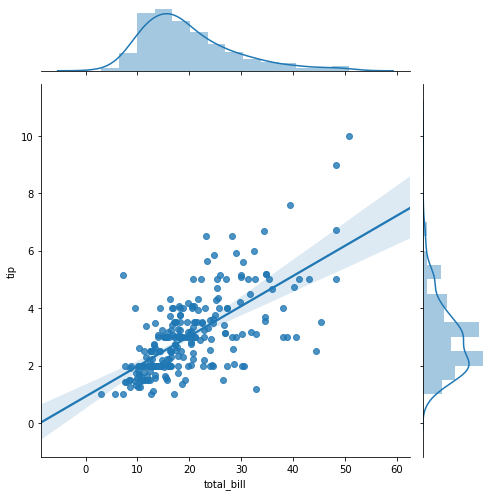

In [6]:
# Compare distribution of total bill and tips
# Code adapted https://seaborn.pydata.org/tutorial/distributions.html#plotting-univariate-distributions and
# https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot
sns.jointplot(x="total_bill", y="tip", kind="reg", height=7, data=tips);

The plot above shows a general trend that the tip received is directly proportional to the amount of the total bill.

### Analyse of Dataset

#### Distribution of data for smokers
The following plots give the distribution of data points splitting smokers from non-smokers.

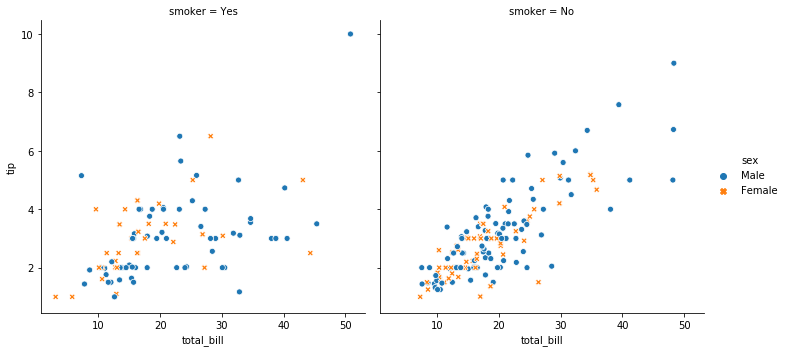

In [7]:
# Display relative plot of bill payed by either sex and if they were a smoker
sns.relplot(x="total_bill", y="tip", col="smoker",
            style="sex", hue="sex", data=tips);

Investigating further, it is clear from the above plots for non-smokers, data points for tips received are clustered proportional to the cost of the total bill. The data points appear more scattered for smokers. This variability in tipping amount for smokers may infer that some smokers choose to spend on smoking rather than tipping if their variable incomes limit their spending power. Both of these observations appears to be true for both male and female patrons.

#### Relative daily plots
The distribution of meal times are indicated in the following plots.

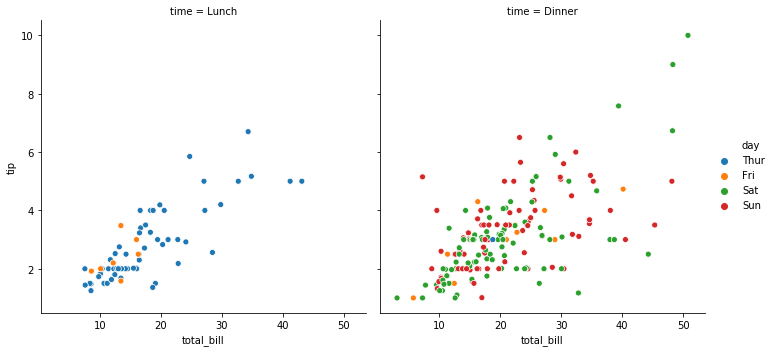

In [8]:
# Display relative plot of mealtime compared to days of the week
# Code adapted from https://seaborn.pydata.org/introduction.html and
# https://seaborn.pydata.org/generated/seaborn.relplot.html
sns.relplot(x="total_bill", y="tip", col="time",
            hue="day", data=tips);

The plots above highlight a distinctive trend in the data. Colour coding of the daily meals indicates that the majority of the lunch time meals occur on Thursday with a lower number on Friday both of which are during the a typical persons working week. Dinner time meals at this restaurant appear to occur more frequently approaching or over the weekend Friday to Sunday, which is to be expected as people generally tend to relax and eat out more in the evenings at the weekend.